# Sara Rahman (2122081642)

## Question 7 (a)
### a) Kp = 1 , kd = 2

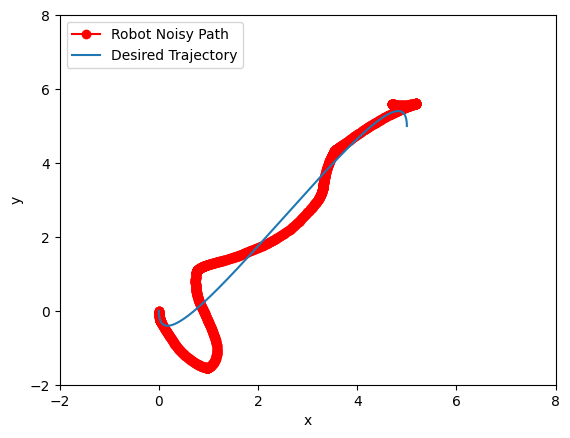

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#given info
T = 15
#i represents initial time T=0, f represents final time T=15
x_i =0
y_i =0
v_i =0.5
theta_i = - np.pi/2
x_f =5
y_f = 5
v_f= 0.5
theta_f= np.pi/2

x_dot_i= 0          #x_dot_i=x_dot(0) = v(0)*cos(theta(0))
y_dot_i= -0.5       #y_dot_i=x_dot(0) = v(0)*sin(theta(0))
x_dot_f= 0         #x_dot_f=x_dot(T) = v(0)*cos(theta(T))
y_dot_f= -0.5      #y_dot_f= x_dot(T) = v(0)*sin(theta(T))

# Ax = b or x= (A^-1)*b
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])

b= np.array([x_i, x_dot_i, y_i, y_dot_i, x_f, x_dot_f, y_f, y_dot_f])
A_inv= np.linalg.inv(A)
p= np.dot(A_inv,b)   #p as control inputs or the vector of unknown paramtres
dt = 0.01
#dt = 0.1
t = np.arange(0, T + dt, dt)  #time array

#Desired trajectory like hw2
x_d =p[0]+p[1]*t +p[2]*t**2 +p[3]*t**3
y_d =p[4] + p[5]*t +p[6]*t**2+ p[7]*t**3
x_dot_d= p[1] +2*p[2]*t + 3*p[3]*t**2
y_dot_d= p[5] +2*p[6]*t + 3*p[7]*t**2
x_dotdot_d= 2*p[2]+ 6*p[3]*t
y_dotdot_d= 2*p[6]+ 6*p[7]*t

#robot will follow
x= np.zeros_like(t)
y= np.zeros_like(t)
theta = np.zeros_like(t)
v = np.full_like(t, 0.5)
x[0]= x_i
y[0]=y_i
theta[0] =theta_i

#Control gains
kpx,kpy= 2,2  #Proportional gain
kdx,kdy= 1, 1  #Derivative gain

fig, grph = plt.subplots()
line, = grph.plot([],[], 'ro-',label='Robot Noisy Path')
grph.plot(x_d,y_d, label='Desired Trajectory')
grph.set_xlabel('x')
grph.set_ylabel('y')
grph.axis([-2,8, -2,8])
grph.legend(loc='upper left')

def update(frame):

  #for tracking kp and kd is being added
    ex=x[frame] -x_d[frame]
    ey=y[frame] -y_d[frame]
    ex_dot=v[frame] *np.cos(theta[frame])-x_dot_d[frame]
    ey_dot=v[frame] *np.sin(theta[frame])-y_dot_d[frame]

    ax= x_dotdot_d[frame]-kpx *ex-kdx *ex_dot
    ay= y_dotdot_d[frame] -kpy *ey - kdy *ey_dot

    J=np.array([
        [np.cos(theta[frame]), -np.sin(theta[frame])],
        [np.sin(theta[frame]),  np.cos(theta[frame])]])

    a,omega =np.linalg.inv(J).dot(np.array([ax,ay]))      #a as acceleration

    #for random gaussian noise
    noise_v=np.random.normal(0, 0.1)
    noise_theta=np.random.normal(0, 0.01)

    #euler's method followed here
    v[frame+1]= v[frame]+dt * a+ noise_v
    theta[frame+1]= theta[frame]+dt * omega+ noise_theta
    x[frame+1]= x[frame]+dt *v[frame] * np.cos(theta[frame])
    y[frame+1]= y[frame]+dt *v[frame]* np.sin(theta[frame])

    line.set_data(x[:frame+ 1],y[:frame+ 1])
    return line,

ani = FuncAnimation(fig, update, frames=len(t) - 1, blit=True, interval=10)  #for video animation
html5_vid = ani.to_html5_video()
HTML(html5_vid)


## Question 7 (b)

### b)  Kp = 4 and kd = 4.

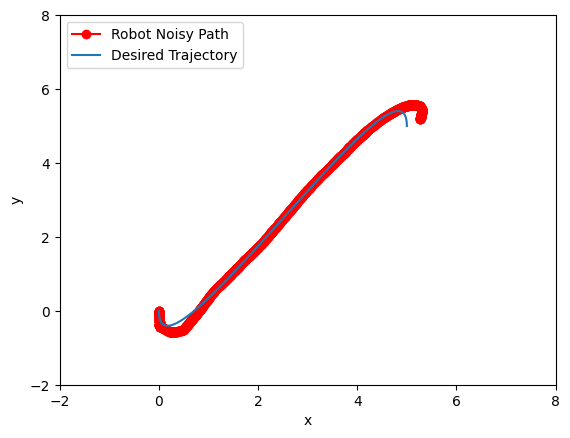

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#given info
T = 15
#i represents initial time T=0, f represents final time T=15
x_i =0
y_i =0
v_i =0.5
theta_i = - np.pi/2
x_f =5
y_f = 5
v_f= 0.5
theta_f= np.pi/2

x_dot_i= 0          #x_dot_i=x_dot(0) = v(0)*cos(theta(0))
y_dot_i= -0.5       #y_dot_i=x_dot(0) = v(0)*sin(theta(0))
x_dot_f= 0         #x_dot_f=x_dot(T) = v(0)*cos(theta(T))
y_dot_f= -0.5      #y_dot_f= x_dot(T) = v(0)*sin(theta(T))

# Ax = b or x= (A^-1)*b
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, T**2, T**3, 0, 0, 0, 0],
    [0, 1, 2*T, 3*T**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, T**2, T**3],
    [0, 0, 0, 0, 0, 1, 2*T, 3*T**2]
])
b = np.array([x_i, x_dot_i, y_i, y_dot_i, x_f, x_dot_f, y_f, y_dot_f])
A_inv = np.linalg.inv(A)
p= np.dot(A_inv,b)   #p as control inputs or the vector of unknown parametres
dt = 0.01
#dt = 0.1
t = np.arange(0,T+dt, dt)  #time array

#Desired trajectory like hw2
x_d =p[0]+p[1]*t +p[2]*t**2 +p[3]*t**3
y_d =p[4] + p[5]*t +p[6]*t**2+ p[7]*t**3
x_dot_d= p[1] +2*p[2]*t + 3*p[3]*t**2
y_dot_d= p[5] +2*p[6]*t + 3*p[7]*t**2
x_dotdot_d= 2*p[2]+ 6*p[3]*t
y_dotdot_d= 2*p[6]+ 6*p[7]*t

#robot will follow
x= np.zeros_like(t)
y= np.zeros_like(t)
theta = np.zeros_like(t)
v = np.full_like(t, 0.5)
x[0]= x_i
y[0]=y_i
theta[0] =theta_i

#Control gains
kpx,kpy=4,4  #Proportional gain
kdx,kdy=4,4  #Derivative gain

fig, grph = plt.subplots()
line, = grph.plot([],[], 'ro-',label='Robot Noisy Path')
grph.plot(x_d,y_d, label='Desired Trajectory')
grph.set_xlabel('x')
grph.set_ylabel('y')
grph.axis([-2,8, -2,8])
grph.legend(loc='upper left')

def update(frame):


  #for tracking kp and kd is being added
    ex=x[frame] -x_d[frame]
    ey=y[frame] -y_d[frame]
    ex_dot=v[frame] *np.cos(theta[frame])-x_dot_d[frame]
    ey_dot=v[frame] *np.sin(theta[frame])-y_dot_d[frame]

    ax= x_dotdot_d[frame]-kpx *ex-kdx *ex_dot
    ay= y_dotdot_d[frame] -kpy *ey - kdy *ey_dot

    J=np.array([
        [np.cos(theta[frame]), -np.sin(theta[frame])],
        [np.sin(theta[frame]),  np.cos(theta[frame])]])

    a,omega =np.linalg.inv(J).dot(np.array([ax,ay]))        #a as acceleratin

    #for random gaussian noise
    noise_v=np.random.normal(0, 0.1)
    noise_theta=np.random.normal(0, 0.01)

    #euler's method followed here
    v[frame+1]= v[frame]+dt * a+ noise_v
    theta[frame+1]= theta[frame]+dt * omega+ noise_theta
    x[frame+1]= x[frame]+dt *v[frame] * np.cos(theta[frame])
    y[frame+1]= y[frame]+dt *v[frame]* np.sin(theta[frame])

    line.set_data(x[:frame+ 1],y[:frame+ 1])
    return line,

ani = FuncAnimation(fig, update, frames=len(t) - 1, blit=True, interval=10)  #for video animation
html5_vid = ani.to_html5_video()
HTML(html5_vid)
